**REGRESION LOGISTICA MULTINOMIAL**

**CLASIFICACION**

In [20]:
import numpy as np
import pandas as pd

df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [21]:
#Comprobamos que en el csv no hay valores Nan
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Ya que hay 9 variables objeto vamos a categorizarlas

In [22]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [25]:
from sklearn.preprocessing import LabelEncoder

# Crear un codificador
label_encoder = LabelEncoder()

# Categorizar las columnas menos OBeyesdad
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['family_history_with_overweight'] = label_encoder.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = label_encoder.fit_transform(df['FAVC'])
df['SMOKE'] = label_encoder.fit_transform(df['SMOKE'])
df['SCC'] = label_encoder.fit_transform(df['SCC'])
df['CAEC'] = label_encoder.fit_transform(df['CAEC'])
df['CALC'] = label_encoder.fit_transform(df['CALC'])
df['MTRANS'] = label_encoder.fit_transform(df['MTRANS'])
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])


Comprobamos que estan todas las variables categorizadas con el info()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [51]:
#Definimos las variables X e y

X = df.drop(columns="NObeyesdad")
y = df["NObeyesdad"]


In [52]:
#Calculamos las correlaciones con la variable objetivo

correlaciones = df.corr()["NObeyesdad"].sort_values(ascending=False)
print("Correlaciones con la variable objetivo:")
print(correlaciones)

Correlaciones con la variable objetivo:
NObeyesdad                        1.000000
Weight                            0.387641
CAEC                              0.327295
family_history_with_overweight    0.313667
Age                               0.235660
CH2O                              0.108839
FAVC                              0.044582
Height                            0.039671
Gender                            0.024908
FCVC                              0.018597
SMOKE                            -0.023256
MTRANS                           -0.046202
SCC                              -0.050679
TUE                              -0.069446
NCP                              -0.092637
FAF                              -0.129504
CALC                             -0.134632
Name: NObeyesdad, dtype: float64


In [53]:
print(y.value_counts(normalize=True))  # Proporciones
print(y.value_counts()) 

NObeyesdad
2    0.166272
4    0.153482
3    0.140692
5    0.137376
6    0.137376
1    0.135955
0    0.128849
Name: proportion, dtype: float64
NObeyesdad
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.84      1.00      0.91        56
           1       0.91      0.63      0.74        62
           2       0.95      0.90      0.92        78
           3       0.89      0.97      0.93        58
           4       1.00      1.00      1.00        63
           5       0.77      0.77      0.77        56
           6       0.75      0.86      0.80        50

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.88      0.87      0.87       423



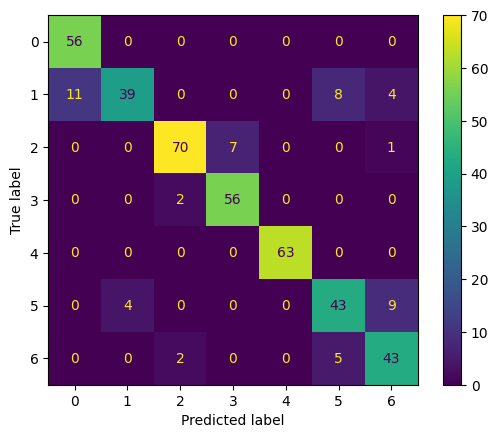

In [58]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Dividimos el dataset en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creamos el modelo de regresión logística multinomial
model = LogisticRegression(max_iter=500)

# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos predicciones
y_pred = model.predict(X_test)

# Mostramos el reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()


**Ajuste de parametros**

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

parametros = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Valores del parámetro de regularización C
    "solver": [ "lbfgs"]# Algoritmos de optimización para ajustar la regresión logística
}

model = LogisticRegression(max_iter=500)

grid_search = GridSearchCV(model, parametros, cv=5, scoring="accuracy")

# Ajustamos GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimimos los mejores hiperparámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Imprimimos la mejor precisión obtenida durante la validación cruzada
print("Mejor Accuracy:", grid_search.best_score_)

Mejores parámetros: {'C': 100, 'solver': 'lbfgs'}
Mejor Accuracy: 0.9490615068565308


Comprobamos que con el ajuste de parametros el Accuracy incrementa un 8%, pasando de predecir un 87% a un 95% de los datos de entrenamiento. Esto muestra que el modelo puede mejorar su capacidad de prediccion en su entrenamiento.